Dataset: https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction/data

# Import Packages

In [1]:
#!pip install xgboost
#!pip install lightgbm

In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import warnings
warnings.filterwarnings("ignore")

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, roc_curve, f1_score, auc, roc_auc_score
from sklearn.metrics import classification_report, recall_score

**AdaBoost,** short for Adaptive Boosting, is an ensemble machine learning algorithm that can be used in a wide variety of classification and regression tasks. It is a supervised learning algorithm that is used to classify data by combining multiple weak or base learners (e.g., decision trees) into a strong learner. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

# Exploratory Data Analysis

In [3]:
df = pd.read_csv('Employee.csv')
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [5]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [6]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [7]:
df.duplicated().sum()

1889

In [8]:
df = df.drop_duplicates()
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [9]:
df['Education'].value_counts()

Bachelors    1971
Masters       637
PHD           156
Name: Education, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

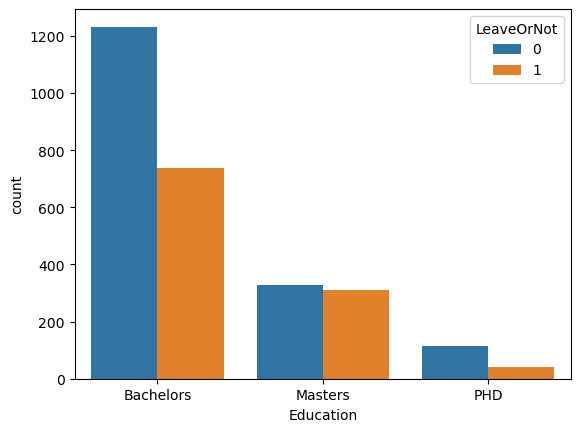

In [10]:
sns.countplot(data = df, x = 'Education', hue = 'LeaveOrNot')

In [11]:
df['JoiningYear'].value_counts()

2017    662
2015    464
2013    396
2014    385
2016    310
2012    308
2018    239
Name: JoiningYear, dtype: int64

<Axes: xlabel='JoiningYear', ylabel='count'>

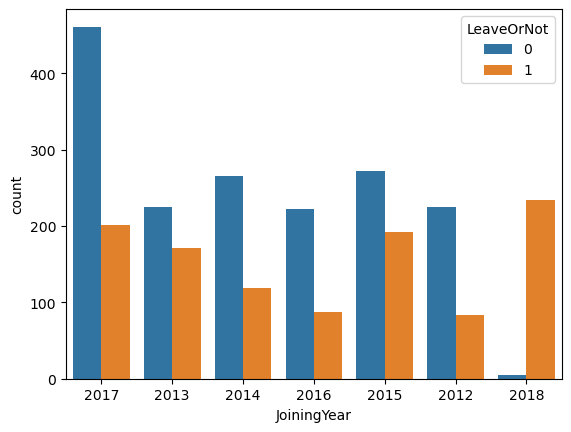

In [12]:
df['JoiningYear'] = df['JoiningYear'].astype(str)
sns.countplot(data = df, x = 'JoiningYear', hue = 'LeaveOrNot')

In [13]:
df['City'].value_counts()

Bangalore    1171
Pune          801
New Delhi     792
Name: City, dtype: int64

<Axes: xlabel='City', ylabel='count'>

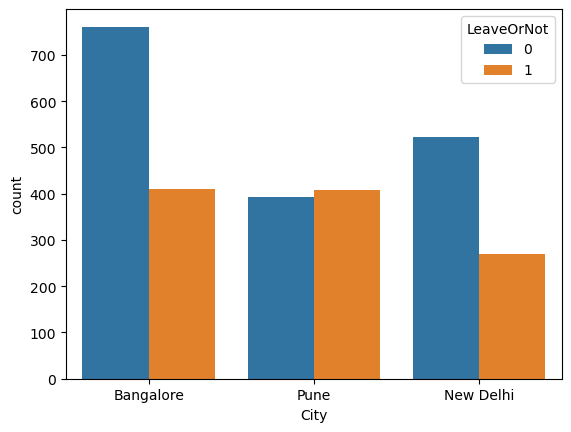

In [14]:
sns.countplot(data = df, x = 'City', hue = 'LeaveOrNot')

In [15]:
df['PaymentTier'].value_counts()

3    1976
2     570
1     218
Name: PaymentTier, dtype: int64

<Axes: xlabel='PaymentTier', ylabel='count'>

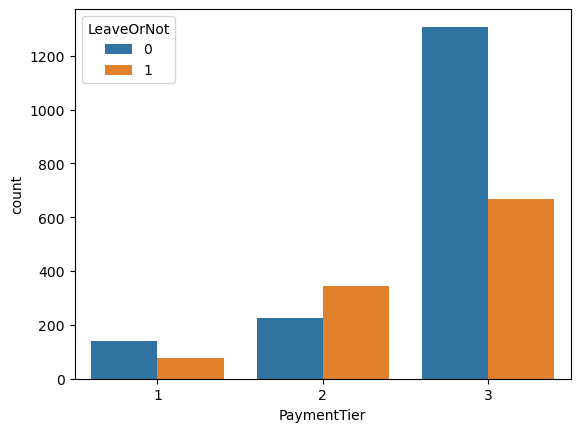

In [16]:
sns.countplot(data = df, x = 'PaymentTier', hue = 'LeaveOrNot')

In [17]:
df['Age'].value_counts()

28    365
27    218
30    186
29    180
26    179
25    167
24    161
36    121
40    119
37    119
34    118
38    117
39    115
31    115
33    114
32    113
35    110
41     75
23     41
22     31
Name: Age, dtype: int64

<Axes: xlabel='Age', ylabel='count'>

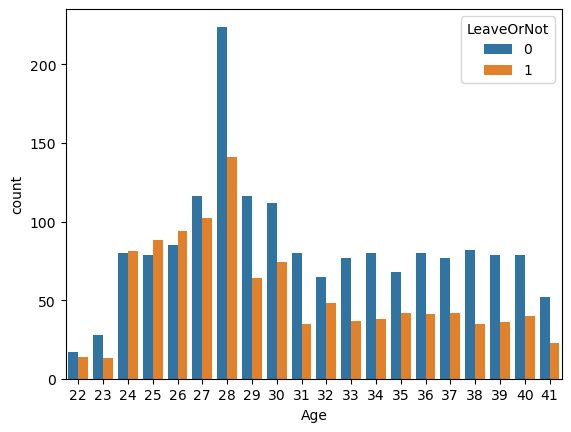

In [18]:
sns.countplot(data = df, x = 'Age', hue = 'LeaveOrNot')

In [19]:
df['Gender'].value_counts()

Male      1529
Female    1235
Name: Gender, dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

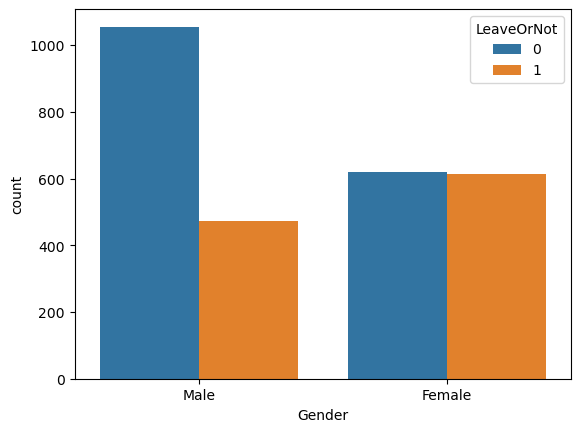

In [20]:
sns.countplot(data = df, x = 'Gender', hue = 'LeaveOrNot')

In [21]:
df['EverBenched'].value_counts()

No     2403
Yes     361
Name: EverBenched, dtype: int64

<Axes: xlabel='EverBenched', ylabel='count'>

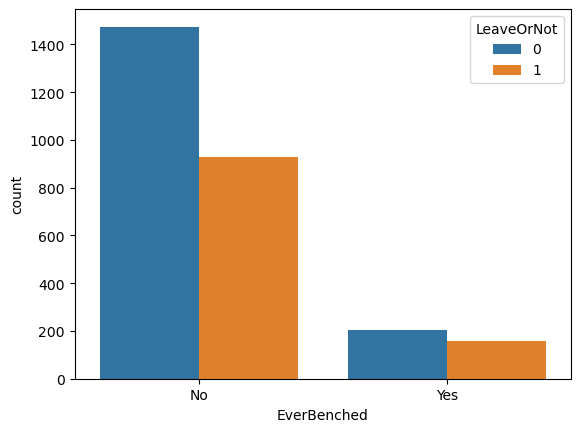

In [22]:
sns.countplot(data = df, x = 'EverBenched', hue = 'LeaveOrNot')

<Axes: xlabel='ExperienceInCurrentDomain', ylabel='count'>

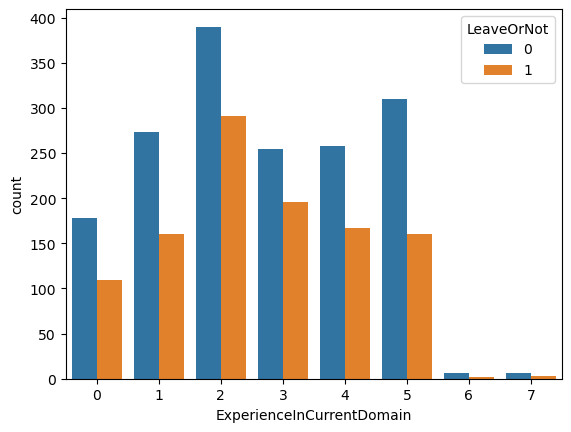

In [23]:
sns.countplot(data = df, x = 'ExperienceInCurrentDomain', hue = 'LeaveOrNot')

<Axes: xlabel='LeaveOrNot', ylabel='Age'>

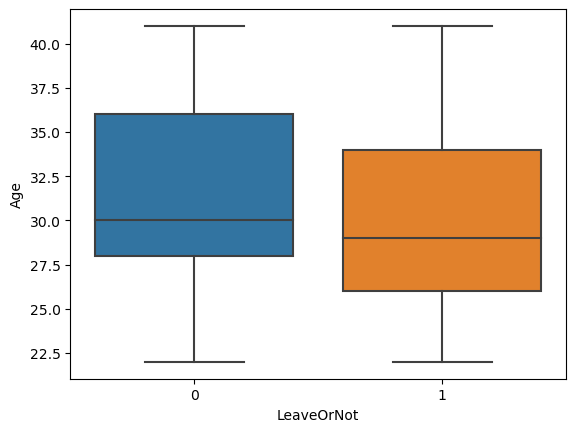

In [24]:
sns.boxplot(data = df, x = 'LeaveOrNot', y = 'Age')

<Axes: xlabel='AgeGroup', ylabel='count'>

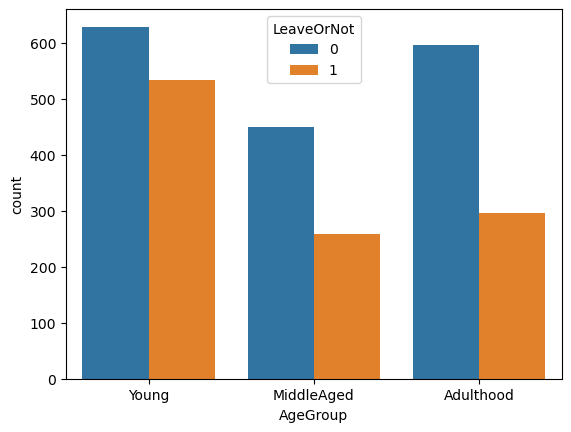

In [25]:
age_groups = ['Young', 'MiddleAged', 'Adulthood']
df['AgeGroup'] = pd.qcut(df['Age'], q = 3, labels = age_groups)
sns.countplot(data = df, x = 'AgeGroup', hue = 'LeaveOrNot')

In [26]:
df['LeaveOrNot'].value_counts()

0    1676
1    1088
Name: LeaveOrNot, dtype: int64

<Axes: xlabel='LeaveOrNot', ylabel='count'>

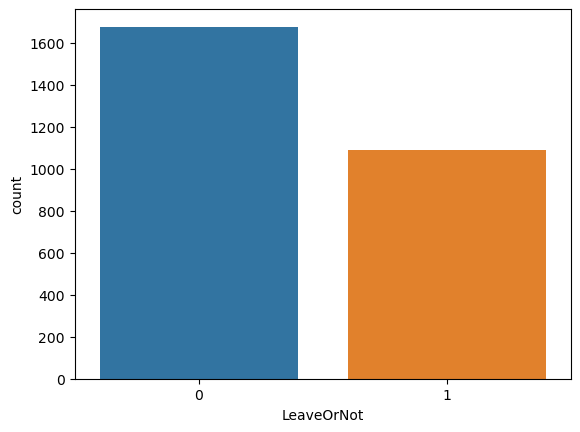

In [27]:
sns.countplot(data = df, x = 'LeaveOrNot')

In [28]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,AgeGroup
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0,Adulthood
1,Bachelors,2013,Pune,1,28,Female,No,3,1,Young
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0,Adulthood
3,Masters,2016,Bangalore,3,27,Male,No,5,1,Young
4,Masters,2017,Pune,3,24,Male,Yes,2,1,Young


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2764 entries, 0 to 4651
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Education                  2764 non-null   object  
 1   JoiningYear                2764 non-null   object  
 2   City                       2764 non-null   object  
 3   PaymentTier                2764 non-null   int64   
 4   Age                        2764 non-null   int64   
 5   Gender                     2764 non-null   object  
 6   EverBenched                2764 non-null   object  
 7   ExperienceInCurrentDomain  2764 non-null   int64   
 8   LeaveOrNot                 2764 non-null   int64   
 9   AgeGroup                   2764 non-null   category
dtypes: category(1), int64(4), object(5)
memory usage: 218.8+ KB


<Axes: >

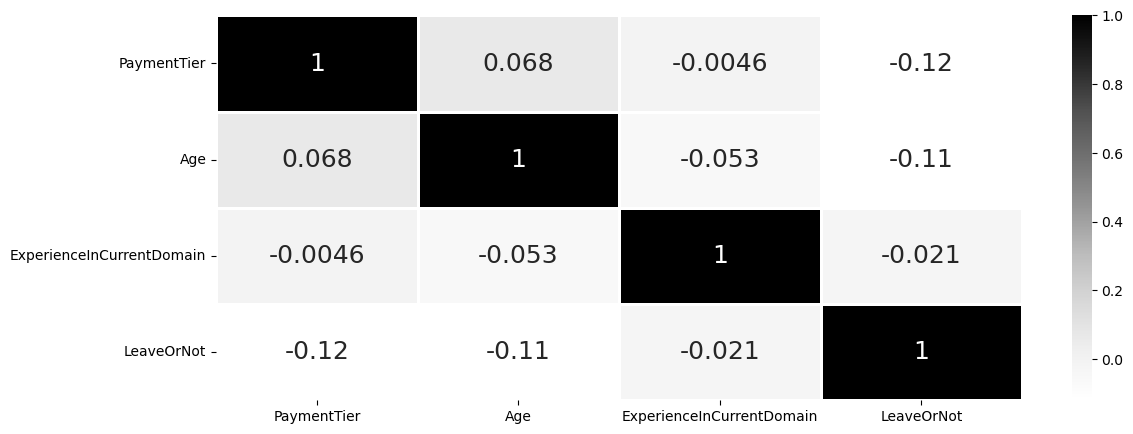

In [30]:
plt.figure(figsize = (13,5))
sns.heatmap(df.corr(), 
            annot = True, 
            cmap = 'Greys', 
            linewidths = 2, 
            linecolor = 'white', 
            cbar = True, 
            annot_kws = {'size': 18})

# Feature Scaling and Engineering

In [31]:
X = df.drop('LeaveOrNot', axis = 1)
y = df['LeaveOrNot']
print(X)
print(y)

      Education JoiningYear       City  PaymentTier  Age  Gender EverBenched  \
0     Bachelors        2017  Bangalore            3   34    Male          No   
1     Bachelors        2013       Pune            1   28  Female          No   
2     Bachelors        2014  New Delhi            3   38  Female          No   
3       Masters        2016  Bangalore            3   27    Male          No   
4       Masters        2017       Pune            3   24    Male         Yes   
...         ...         ...        ...          ...  ...     ...         ...   
4645    Masters        2017       Pune            2   31  Female          No   
4647  Bachelors        2016       Pune            3   30    Male          No   
4649    Masters        2013       Pune            2   37    Male          No   
4650    Masters        2018  New Delhi            3   27    Male          No   
4651  Bachelors        2012  Bangalore            3   30    Male         Yes   

      ExperienceInCurrentDomain    AgeG

In [44]:
y = y.astype(int)
y.info()

<class 'pandas.core.series.Series'>
Int64Index: 2764 entries, 0 to 4651
Series name: LeaveOrNot
Non-Null Count  Dtype
--------------  -----
2764 non-null   int32
dtypes: int32(1)
memory usage: 32.4 KB


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [33]:
print("Training Size:", X_train.shape)
print('Testing Size:', X_test.shape)

Training Size: (2211, 9)
Testing Size: (553, 9)


In [34]:
ordinal_categories = [['Bachelors', 'Masters', 'PHD']]
multi_categories = ['JoiningYear', 'City', 'AgeGroup']
binary_categories = ['Gender', 'EverBenched']
scale_features = ['Age', 'ExperienceInCurrentDomain']
transformer = ColumnTransformer(
    transformers = [
        ('ohe_multi', OneHotEncoder(drop = 'first', sparse = False), multi_categories),
        ('oe', OrdinalEncoder(categories = ordinal_categories), ['Education']),
        ('ohe_bi', OneHotEncoder(drop = 'first', sparse = False), binary_categories),
        ('standard_scale', MinMaxScaler(), scale_features)
    ], remainder = 'passthrough'
)
X_train = transformer.fit_transform(X_train)
X_train

array([[0.        , 0.        , 1.        , ..., 0.73684211, 0.        ,
        3.        ],
       [1.        , 0.        , 0.        , ..., 0.42105263, 0.14285714,
        3.        ],
       [0.        , 0.        , 0.        , ..., 0.31578947, 0.14285714,
        3.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.52631579, 0.14285714,
        3.        ],
       [0.        , 0.        , 1.        , ..., 0.84210526, 0.71428571,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.47368421, 0.42857143,
        3.        ]])

In [35]:
X_train[0]

array([0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 1.        , 0.        , 0.73684211, 0.        ,
       3.        ])

In [36]:
X_train.shape

(2211, 16)

In [37]:
X_test = transformer.fit_transform(X_test)
X_test

array([[0.        , 0.        , 1.        , ..., 0.73684211, 0.28571429,
        3.        ],
       [0.        , 0.        , 0.        , ..., 0.94736842, 0.71428571,
        2.        ],
       [0.        , 0.        , 1.        , ..., 0.10526316, 0.28571429,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.84210526, 0.28571429,
        3.        ],
       [0.        , 0.        , 1.        , ..., 0.21052632, 0.57142857,
        3.        ],
       [0.        , 0.        , 0.        , ..., 0.31578947, 0.14285714,
        3.        ]])

In [38]:
X_test[0]

array([0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.73684211, 0.28571429,
       3.        ])

In [39]:
X_test.shape

(553, 16)

# Build Models

XGBClassifier parameters: https://xgboost.readthedocs.io/en/stable/parameter.html

Evaluation Metric for XGBClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html

In [40]:
knc = KNeighborsClassifier()
mnb = MultinomialNB()
bnb = BernoulliNB()
lac = Lasso()
sgdc = SGDClassifier()
svc = SVC()
dtc = DecisionTreeClassifier(max_depth = 7, random_state = 2)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l2')
rfc = RandomForestClassifier(n_estimators = 17, random_state = 2, max_depth = 5)
abc = AdaBoostClassifier(n_estimators = 17, random_state = 2, learning_rate = 0.1)
bc = BaggingClassifier(n_estimators = 17, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 18, random_state = 2)
xgb = XGBClassifier(n_estimators = 17, random_state = 2, use_label_encoder = False, eval_metrics = 'mlogloss')
lgbm = LGBMClassifier(verbose = -1, 
                      learning_rate = 0.1, 
                      max_depth = 6, 
                      num_leaves = 10, 
                      n_estimators = 17, 
                      max_bin = 500, 
                      random_state = 2)

In [53]:
clfs = {
    'KNC': knc,
    'MNB': mnb,
    'BNB': bnb,
    'SGDC': sgdc,
    'SVC': svc,
    'DTC': dtc,
    'LRC': lrc,
    'RFC': rfc,
    'AdaBoost': abc,
    'BC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB': xgb,
    'LGBM': lgbm
}

def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division = 0)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    return accuracy, precision, f1, recall

accuracy_scores = []
precision_scores = []
f1_scores = []
recall_scores = []

for name, clf in clfs.items():
    model_accuracy, model_precision, model_f1, model_recall = train_classifier(clf, X_train, y_train, X_test, y_test)
    accuracy_scores.append(model_accuracy)
    precision_scores.append(model_precision)
    f1_scores.append(model_f1)
    recall_scores.append(model_recall)
    
performance_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'f1 Score': f1_scores
})

performance_df.sort_values('Accuracy', ascending = False)

,Algorithm,Accuracy,Precision,Recall,f1 Score
5,DTC,0.835443,0.933333,0.633484,0.754717
12,XGB,0.826401,0.883436,0.651584,0.750000
13,LGBM,0.819168,0.935252,0.588235,0.722222
4,SVC,0.795660,0.880282,0.565611,0.688705
7,RFC,0.779385,0.872180,0.524887,0.655367
3,SGDC,0.764919,0.925234,0.447964,0.603659
6,LRC,0.763110,0.792208,0.552036,0.650667
0,KNC,0.761302,0.745856,0.610860,0.671642
11,GBDT,0.759494,0.879310,0.461538,0.605341
2,BNB,0.745027,0.773973,0.511312,0.615804


![PrecisionRecall](PrecisionRecall.png)

# Cross Validation with StratefiedKfold

n_jobs: -1 means using all processors. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [55]:
kfold = StratifiedKFold(n_splits = 8, shuffle = True, random_state = 42)

cv_results = []

for name, clf in clfs.items():
    cv_results.append(cross_val_score(clf, X_train, y_train, scoring = 'accuracy', cv = kfold, n_jobs = -1))
    
cv_results[0]

array([0.71119134, 0.72202166, 0.7833935 , 0.74637681, 0.76449275,
       0.7173913 , 0.72101449, 0.7173913 ])

In [61]:
cv_means = []
cv_std = []

for i in cv_results:
    cv_means.append(i.mean())
    cv_std.append(i.std())
    
cv_df = pd.DataFrame({
    'Algorithm': clfs.keys(),
    'Cross Validation Mean Accuracy': cv_means,
    'Cross Validation Standard Error': cv_std
})

cv_df = cv_df.sort_values('Cross Validation Mean Accuracy', ascending = False)
cv_df

,Algorithm,Cross Validation Mean Accuracy,Cross Validation Standard Error
12,XGB,0.796928,0.028444
5,DTC,0.796492,0.029167
13,LGBM,0.789245,0.021577
4,SVC,0.773865,0.029038
7,RFC,0.768435,0.024352
11,GBDT,0.753973,0.025531
6,LRC,0.739484,0.024522
0,KNC,0.735409,0.024726
2,BNB,0.724564,0.030803
1,MNB,0.715061,0.023249


<Figure size 1200x800 with 0 Axes>

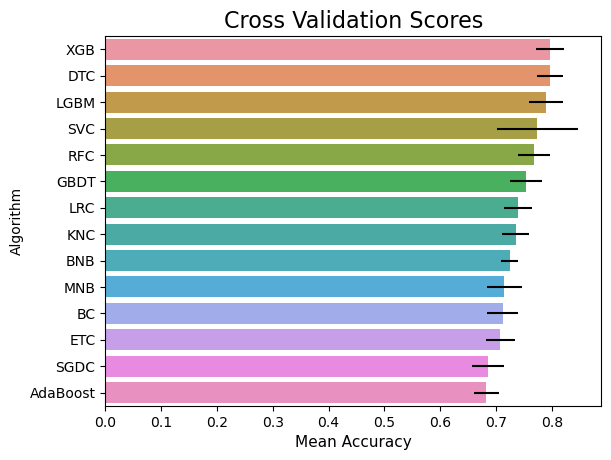

<Figure size 1200x800 with 0 Axes>

In [76]:
g = sns.barplot(data = cv_df, 
                x = "Cross Validation Mean Accuracy", 
                y = "Algorithm", 
                orient = "h", 
                **{'xerr': cv_std},
                )
g.set_xlabel("Mean Accuracy", fontsize = 11)
g = g.set_title("Cross Validation Scores", fontsize = 16)
plt.figure(figsize = (12,8))